In [1]:
# effect of batchnorm


from tensorflow import keras 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from numpy import mean
from numpy import std
from matplotlib import pyplot
from tensorflow.keras import layers
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainY = to_categorical(trainY)
testY = to_categorical(testY)
	
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0


In [ ]:
scores, histories = list(), list()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
estp = EarlyStopping(monitor='val_loss', min_delta=0.0005,patience=8, verbose=1, mode='auto',restore_best_weights=True)
history = model.fit(train_norm, trainY, epochs=40, batch_size=32, validation_split=0.1,shuffle='True',verbose=2, callbacks=[estp])
_, acc = model.evaluate(testX, testY, verbose=0)
print(' ')
print('> %.3f' % (acc * 100.0))
scores.append(acc)
histories.append(history)

Epoch 1/40
1688/1688 - 5s - loss: 0.1626 - accuracy: 0.9498 - val_loss: 0.0675 - val_accuracy: 0.9815
Epoch 2/40
1688/1688 - 4s - loss: 0.0579 - accuracy: 0.9820 - val_loss: 0.0595 - val_accuracy: 0.9823
Epoch 3/40
1688/1688 - 4s - loss: 0.0425 - accuracy: 0.9866 - val_loss: 0.0425 - val_accuracy: 0.9880
Epoch 4/40
1688/1688 - 4s - loss: 0.0319 - accuracy: 0.9897 - val_loss: 0.0531 - val_accuracy: 0.9848
Epoch 5/40
1688/1688 - 4s - loss: 0.0259 - accuracy: 0.9917 - val_loss: 0.0368 - val_accuracy: 0.9888
Epoch 6/40
1688/1688 - 5s - loss: 0.0210 - accuracy: 0.9937 - val_loss: 0.0341 - val_accuracy: 0.9913
Epoch 7/40
1688/1688 - 5s - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.0362 - val_accuracy: 0.9900
Epoch 8/40
1688/1688 - 5s - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0415 - val_accuracy: 0.9900
Epoch 9/40
1688/1688 - 5s - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0357 - val_accuracy: 0.9908
Epoch 10/40
1688/1688 - 5s - loss: 0.0108 - accuracy: 0.9968 - val_loss: 0.0346 - 

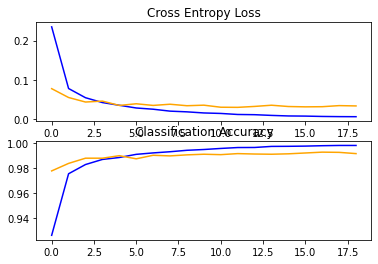

In [24]:
for i in range(len(histories)):
		# plot loss
	pyplot.subplot(2, 1, 1)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(histories[i].history['loss'], color='blue', label='train')
	pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')

pyplot.show()

In [ ]:
for i in range(len(histories)):
    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
pyplot.show()